In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import featuretools as ft
import helper_functions as hf
import torch
from tqdm import tqdm

import ta
from ta.utils import dropna
from ta import add_all_ta_features
import matplotlib as mpl
mpl.style.use('seaborn')

In [85]:
stock_prices    = pd.read_csv("modified_data/stock_prices.csv")
# financials      = pd.read_csv("modified_data/financials.csv")
# options         = pd.read_csv("modified_data/options.csv")
# secondary       = pd.read_csv("modified_data/secondary_stock_prices.csv")
# stock_list      = pd.read_csv("modified_data/tokenized_stock_list.csv")
# trades          = pd.read_csv("modified_data/trades.csv")

In [3]:
# def RSI(series, period):
#     delta = series.diff().dropna()
#     u = delta * 0
#     d = u.copy()
#     u[delta > 0] = delta[delta > 0]
#     d[delta < 0] = -delta[delta < 0]
#     u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
#     u = u.drop(u.index[:(period-1)])
#     d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
#     d = d.drop(d.index[:(period-1)])
#     rs = pd.DataFrame.ewm(u, com=period-1, adjust=False).mean() / \
#          pd.DataFrame.ewm(d, com=period-1, adjust=False).mean()
#     return 100 - 100 / (1 + rs)

# def rsi_class(x):
#     ret = "low"
#     if x < 50:
#         ret = "low"
#     if x > 50:
#         ret = "med"
#     if x > 70:
#         ret = "hi"
#     return(ret)

# def atr(high, low, close):
#     x1 = high - low
#     x2 = abs(high - close.shift())
#     x3 = abs(low - close.shift())
#     ranges = pd.concat([x1, x2, x3], axis=1)
#     tr = np.max(ranges, axis = 1)
#     atr = tr.rolling(14).sum()/14
#     return atr 

In [4]:
# sns.set(rc={'figure.figsize':(20,5)})
# sns.set_style("whitegrid")
# seclist = stock_prices["SecuritiesCode"][:10]
# for SECURITY in seclist:
#     df_stock = stock_prices[stock_prices['SecuritiesCode'] == SECURITY].reset_index(drop = True)
#     df_stock = df_stock.sort_values(by = "Date").reset_index()
#     df_stock['rsi'] = RSI( df_stock['Close'], 14 )
#     df_stock['rsicat'] = list(map(rsi_class, df_stock['rsi']))
#     plt.title(f"Examining RSI on movement of Price for:{SECURITY}")
#     ax = sns.scatterplot(x = df_stock.index, y = df_stock["Close"], hue = df_stock["rsicat"]);
#     plt.show()

In [5]:
# seclist = stock_prices["SecuritiesCode"][10:15]
# for SECURITY in seclist:
#     df_stock = stock_prices[stock_prices['SecuritiesCode'] == SECURITY].reset_index(drop = True)
#     df_stock_high  = df_stock["High"]
#     df_stock_low   = df_stock["Low"]
#     df_stock_close = df_stock["Close"]

#     atr_final = atr(df_stock_high, df_stock_low, df_stock_close)
#     fig, ax = plt.subplots(figsize= (20, 5))

#     ax1 = ax.twinx()
#     ax.plot(atr_final, label="atr", color="blue")
#     ax.legend(loc="upper right")
#     ax1.plot(df_stock_close, label="close price", color="green")
#     ax1.legend(loc="lower right")

#     ax.set_xlabel('Time')
#     ax.set_ylabel('atr')
#     ax1.set_ylabel('close price')

In [86]:
b = stock_prices[stock_prices["Date"] == "2017-01-04"]["Target"]
print(b.isna().sum())

target = torch.tensor(b)
output = torch.rand(1865)

hf.loss_function(output, target)

1
tensor([True, True, True,  ..., True, True, True])
torch.Size([1864]) torch.Size([1864])


tensor(0.3310, dtype=torch.float64)

In [87]:
# Load datas
df = stock_prices.loc[stock_prices["SecuritiesCode"] == 7974]

# Clean NaN values
# df = dropna(df)

# Add all ta features
df = add_all_ta_features(
    df, open="Open", high="High", low="Low", close="Close", volume="Volume")

/home/aymane/Kaggle/jpx-2022/venv/lib/python3.10/site-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/home/aymane/Kaggle/jpx-2022/venv/lib/python3.10/site-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/home/aymane/Kaggle/jpx-2022/venv/lib/python3.10/site-packages/ta/trend.py:938: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_up = pd.Series(index=self._psar.index)
/home/aymane/Kaggle/jpx-2022/venv/lib/python3.10/site-packages/ta/trend.py:939: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_down = pd.Series(index=self._psar.index)


In [88]:
df.shape
print(df.columns[10:])

Index(['ExpectedDividend', 'SupervisionFlag', 'Target',
       'CumulativeAdjustmentFactor', 'AdjustedClose', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_vwap', 'volume_mfi', 'volume_nvi',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_atr', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 

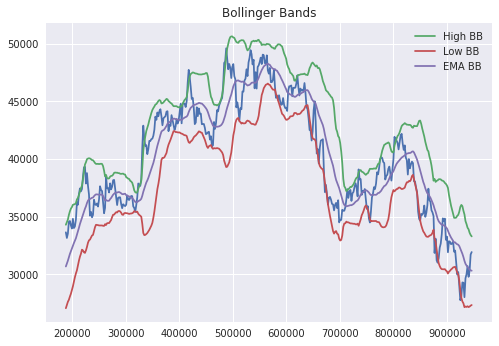

In [89]:
plt.plot(df[100:500].Close)
plt.plot(df[100:500].volatility_bbh, label='High BB')
plt.plot(df[100:500].volatility_bbl, label='Low BB')
plt.plot(df[100:500].volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

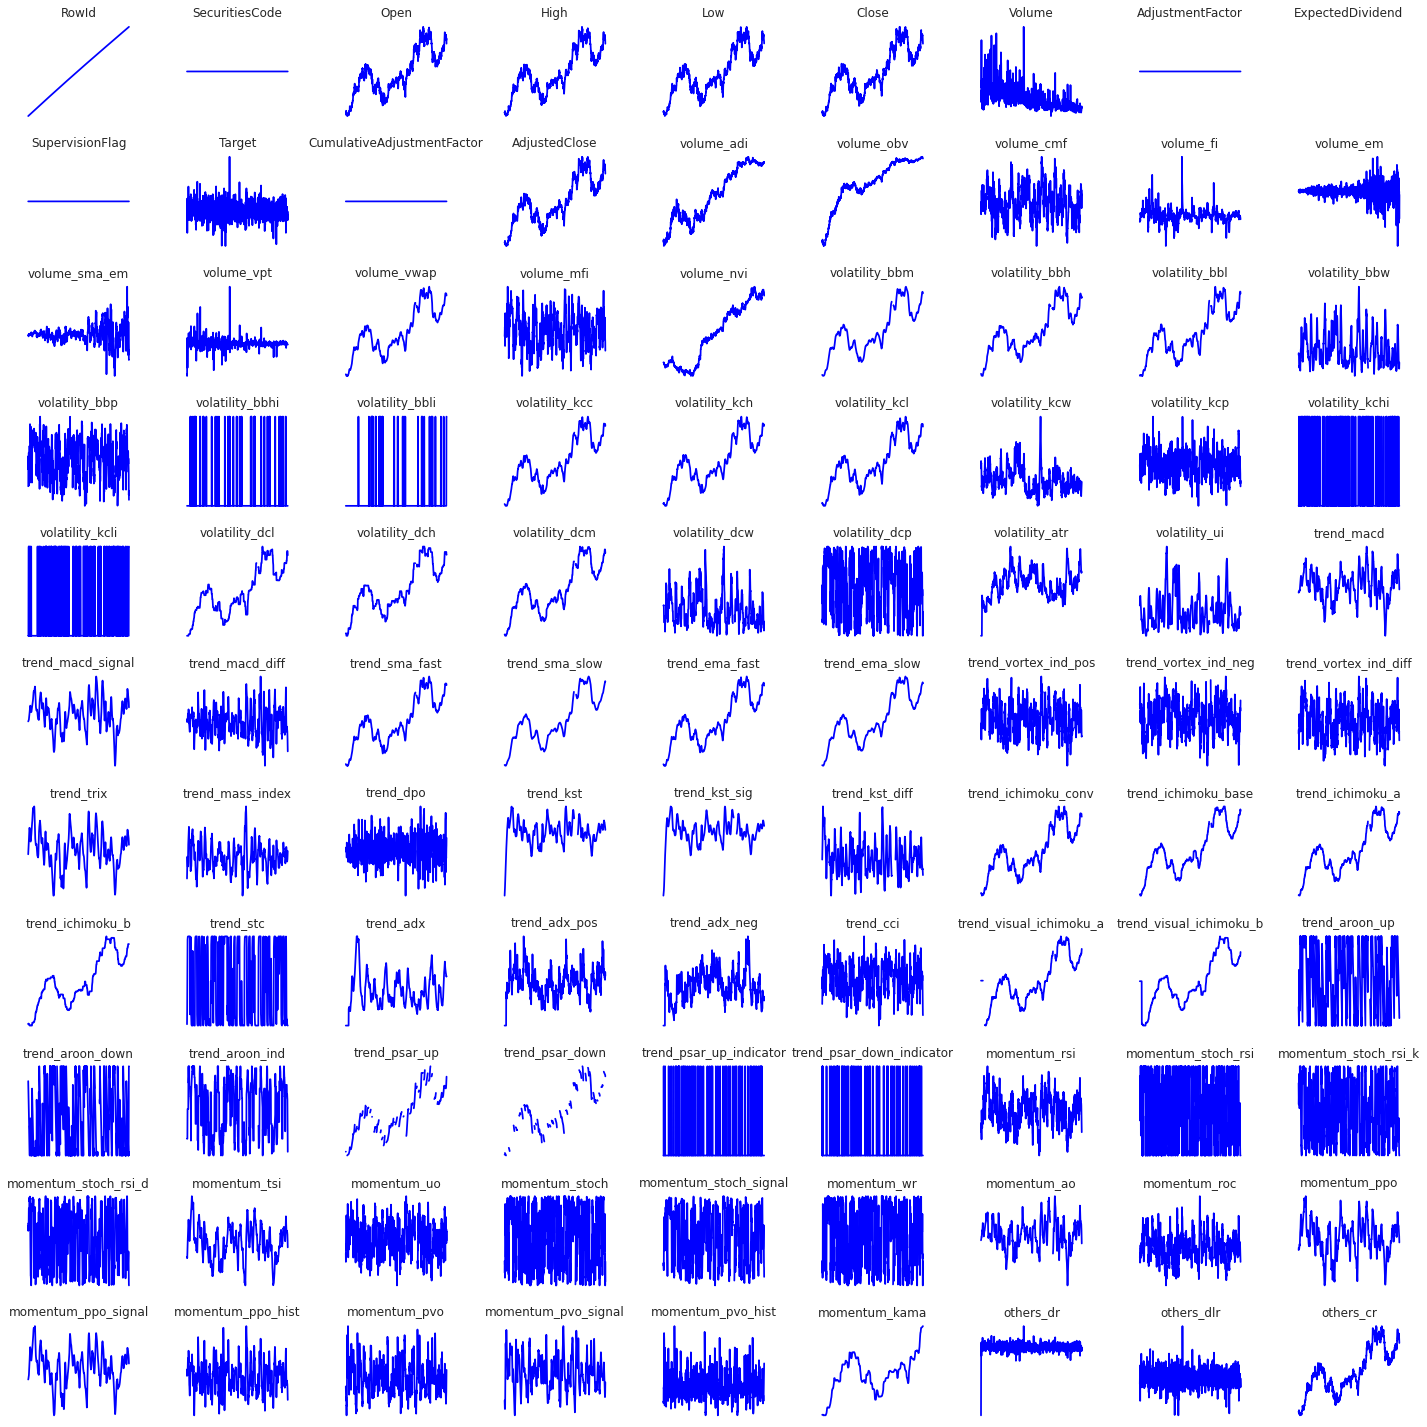

In [90]:
fig, ax = plt.subplots(11, 9, figsize=(20,20))
fig.tight_layout()
ax = ax.flatten()


    ax[i].plot(df[col], color="b")
    ax[i].title.set_text(col)
    ax[i].axis('off')
plt.show()

In [123]:
dic = {}
for i, col in enumerate(df.columns[2:]):
    try:
        target = torch.tensor(list(df["Target"]))
        metric = torch.tensor(list(df[col]))
        idx             = ~torch.isnan(metric)
        target_final    = target[idx]
        metric_final    = metric[idx]
        correlation = np.corrcoef(target_final, metric_final)
        dic[col] = correlation[0][1]
    except:
        pass

sorted(dic.items(), key=lambda x:x[1])

/home/aymane/Kaggle/jpx-2022/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/aymane/Kaggle/jpx-2022/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


[('SecuritiesCode', nan),
 ('ExpectedDividend', -0.5909166830989958),
 ('volatility_dcl', -0.06807644555796598),
 ('volatility_dcm', -0.06648900028127225),
 ('volatility_bbl', -0.06581939770811934),
 ('volatility_bbm', -0.06490177919455664),
 ('volatility_dch', -0.06443542324012876),
 ('trend_visual_ichimoku_a', -0.06346414598623645),
 ('trend_ichimoku_conv', -0.06336989552979924),
 ('trend_ema_slow', -0.06253517739915325),
 ('momentum_kama', -0.061777390522535176),
 ('trend_ema_fast', -0.061381655710316264),
 ('trend_sma_fast', -0.06116297534549035),
 ('trend_ichimoku_a', -0.06097520221734921),
 ('volatility_kcc', -0.06049822998861942),
 ('trend_ichimoku_base', -0.05943721418313227),
 ('trend_sma_slow', -0.05857151531222882),
 ('trend_ichimoku_b', -0.05834882721573304),
 ('trend_psar_up', -0.05833908628181533),
 ('AdjustedClose', -0.056994645242813426),
 ('Open', -0.05647168742065953),
 ('High', -0.056155485867240174),
 ('others_cr', -0.05590292601927656),
 ('Close', -0.05590292471393

In [73]:
df["momentum_roc"]

14

In [71]:
df["Target"]

1392      -0.001453
3257       0.013306
5122       0.031801
6987       0.002187
8852      -0.057540
             ...   
2520046   -0.024623
2522045   -0.001466
2524044   -0.022835
2526042   -0.023535
2528040   -0.011282
Name: Target, Length: 1300, dtype: float64

In [108]:
df["others_cr"]

1392         0.000000
3257        -1.613562
5122        -1.756536
6987        -0.449346
8852         2.716503
              ...    
2520046    159.477124
2522045    157.148693
2524044    150.816993
2526042    150.449346
2528040    144.730392
Name: others_cr, Length: 1300, dtype: float64